In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout

# Read training data from the CSV file
train_file_path = r'D:\Data and Code for Gait Analysis\gait_data_9_27_learning\more_features_2\train\train_all.csv'
feature_train = pd.read_csv(train_file_path)

# Features and labels for training
X_train = feature_train[[
        # Gyroscope features
        'MeanGX', 'MeanGY', 'MeanGZ',
        'VarGX', 'VarGY', 'VarGZ',
        'StdGX', 'StdGY', 'StdGZ',
        'RMSGX', 'RMSGY', 'RMSGZ',
        'KurtosisGX', 'KurtosisGY', 'KurtosisGZ',
        'SkewnessGX', 'SkewnessGY', 'SkewnessGZ',
        'ZCRGX', 'ZCRGY', 'ZCRGZ',
        'PeakToPeakGX', 'PeakToPeakGY', 'PeakToPeakGZ',
        'DominantFreqGX', 'DominantFreqGY','DominantFreqGZ',
        'PowerDominantFreqGX','PowerDominantFreqGY','PowerDominantFreqGZ',
        'EntropyGX', 'EntropyGY','EntropyGZ',
        'SpectralEntropyGX', 'SpectralEntropyGY','SpectralEntropyGZ',
        'PSDGX','PSDGY','PSDGZ',

        # Accelerometer features
        'MeanAX', 'MeanAY', 'MeanAZ',
        'VarAX', 'VarAY', 'VarAZ',
        'StdAX', 'StdAY', 'StdAZ',
        'RMSAX', 'RMSAY', 'RMSAZ',
        'KurtosisAX', 'KurtosisAY', 'KurtosisAZ',
        'SkewnessAX', 'SkewnessAY', 'SkewnessAZ',
        'ZCRAX', 'ZCRAY', 'ZCRAZ',
        'PeakToPeakAX', 'PeakToPeakAY', 'PeakToPeakAZ',
        'DominantFreqAX', 'DominantFreqAY','DominantFreqAZ',
        'PowerDominantFreqAX','PowerDominantFreqAY','PowerDominantFreqAZ',
        'EntropyAX', 'EntropyAY','EntropyAZ',
        'SpectralEntropyAX', 'SpectralEntropyAY','SpectralEntropyAZ',
        'PSDAX','PSDAY','PSDAZ',
        # Additional features
        'SMAA', 'TiltA'
    ]].values  # Add all relevant features

y_train = feature_train['surface_type'].values  # Labels: FLAT, GRASS, GRAVEL

# Convert string labels to integers for training data
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Read testing data from the CSV file
test_file_path = r'D:\Data and Code for Gait Analysis\gait_data_9_27_learning\more_features_2\test\test_all.csv'
feature_test = pd.read_csv(test_file_path)

# Features and labels for testing
X_test = feature_test[[ 
        # Gyroscope features
        'MeanGX', 'MeanGY', 'MeanGZ',
        'VarGX', 'VarGY', 'VarGZ',
        'StdGX', 'StdGY', 'StdGZ',
        'RMSGX', 'RMSGY', 'RMSGZ',
        'KurtosisGX', 'KurtosisGY', 'KurtosisGZ',
        'SkewnessGX', 'SkewnessGY', 'SkewnessGZ',
        'ZCRGX', 'ZCRGY', 'ZCRGZ',
        'PeakToPeakGX', 'PeakToPeakGY', 'PeakToPeakGZ',
        'DominantFreqGX', 'DominantFreqGY','DominantFreqGZ',
        'PowerDominantFreqGX','PowerDominantFreqGY','PowerDominantFreqGZ',
        'EntropyGX', 'EntropyGY','EntropyGZ',
        'SpectralEntropyGX', 'SpectralEntropyGY','SpectralEntropyGZ',
        'PSDGX','PSDGY','PSDGZ',

        # Accelerometer features
        'MeanAX', 'MeanAY', 'MeanAZ',
        'VarAX', 'VarAY', 'VarAZ',
        'StdAX', 'StdAY', 'StdAZ',
        'RMSAX', 'RMSAY', 'RMSAZ',
        'KurtosisAX', 'KurtosisAY', 'KurtosisAZ',
        'SkewnessAX', 'SkewnessAY', 'SkewnessAZ',
        'ZCRAX', 'ZCRAY', 'ZCRAZ',
        'PeakToPeakAX', 'PeakToPeakAY', 'PeakToPeakAZ',
        'DominantFreqAX', 'DominantFreqAY','DominantFreqAZ',
        'PowerDominantFreqAX','PowerDominantFreqAY','PowerDominantFreqAZ',
        'EntropyAX', 'EntropyAY','EntropyAZ',
        'SpectralEntropyAX', 'SpectralEntropyAY','SpectralEntropyAZ',
        'PSDAX','PSDAY','PSDAZ',
        # Additional features
        'SMAA', 'TiltA'
    ]].values  # Add all relevant features

y_test = feature_test['surface_type'].values  # Labels: FLAT, GRASS, GRAVEL

# Convert string labels to integers for testing data
y_test = label_encoder.transform(y_test)

# Split 10% of train and test sets as validation
X_train, X_train_val, y_train, y_train_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
#X_test, X_test_val, y_test, y_test_val = train_test_split(X_test, y_test, test_size=0.1, random_state=42)

# Combine both validation sets
X_val = X_train_val #np.concatenate((X_train_val, X_test_val))
y_val = y_train_val #np.concatenate((y_train_val, y_test_val))

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)  # Should be 3 for FLAT, GRASS, GRAVEL
print(num_classes)

y_train_categorical = to_categorical(y_train, num_classes)
y_val_categorical = to_categorical(y_val, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)


# Build the MLP model
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))  # First dense layer
model.add(Dropout(0.5)) 
model.add(Dense(512, activation='relu'))  # Second dense layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  # Third dense layer
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))  # Fourth dense layer
model.add(Dropout(0.5))  # Dropout layer with 20% dropout rate
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping with a higher patience value
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_categorical,
                    epochs=500, 
                    batch_size=124,  # Reduce batch size to allow more fine-tuned training
                    validation_data=(X_val, y_val_categorical),
                    callbacks=[early_stopping],
                    verbose=2)

# Make predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


3
Epoch 1/500


C:\Users\ayemo\.conda\envs\online_ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


365/365 - 4s - 10ms/step - accuracy: 0.5203 - loss: 0.9683 - val_accuracy: 0.6869 - val_loss: 0.7826
Epoch 2/500
365/365 - 2s - 6ms/step - accuracy: 0.6623 - loss: 0.7863 - val_accuracy: 0.7345 - val_loss: 0.6405
Epoch 3/500
365/365 - 2s - 6ms/step - accuracy: 0.7161 - loss: 0.6906 - val_accuracy: 0.7833 - val_loss: 0.5462
Epoch 4/500
365/365 - 2s - 6ms/step - accuracy: 0.7475 - loss: 0.6287 - val_accuracy: 0.7899 - val_loss: 0.5160
Epoch 5/500
365/365 - 2s - 6ms/step - accuracy: 0.7676 - loss: 0.5879 - val_accuracy: 0.8102 - val_loss: 0.4815
Epoch 6/500
365/365 - 2s - 6ms/step - accuracy: 0.7812 - loss: 0.5549 - val_accuracy: 0.8062 - val_loss: 0.4598
Epoch 7/500
365/365 - 2s - 6ms/step - accuracy: 0.7936 - loss: 0.5288 - val_accuracy: 0.8202 - val_loss: 0.4359
Epoch 8/500
365/365 - 2s - 6ms/step - accuracy: 0.8014 - loss: 0.5078 - val_accuracy: 0.8263 - val_loss: 0.4136
Epoch 9/500
365/365 - 2s - 6ms/step - accuracy: 0.8106 - loss: 0.4902 - val_accuracy: 0.8369 - val_loss: 0.3975
Epo

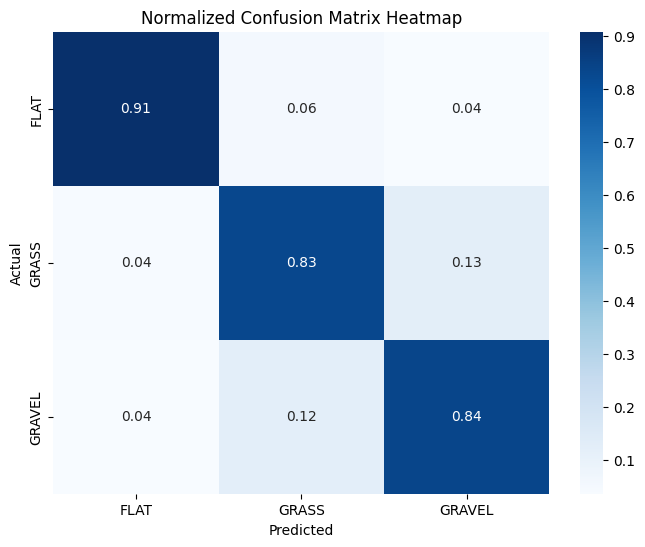

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by dividing each value by the sum of the corresponding row (i.e., normalize by the actual class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix Heatmap')
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

# Read training data from the CSV file
train_file_path = r'D:\Data and Code for Gait Analysis\gait_data_9_27_learning\more_features_2\train\train_all.csv'
feature_train = pd.read_csv(train_file_path)

# Features and labels for training
X_train = feature_train[[
    'MeanGX', 'MeanGY', 'MeanGZ',
    'VarGX', 'VarGY', 'VarGZ',
    'StdGX', 'StdGY', 'StdGZ',
    'RMSGX', 'RMSGY', 'RMSGZ',
    'KurtosisGX', 'KurtosisGY', 'KurtosisGZ',
    'SkewnessGX', 'SkewnessGY', 'SkewnessGZ',
    'ZCRGX', 'ZCRGY', 'ZCRGZ',
    'PeakToPeakGX', 'PeakToPeakGY', 'PeakToPeakGZ',
    'DominantFreqGX', 'DominantFreqGY', 'DominantFreqGZ',
    'PowerDominantFreqGX', 'PowerDominantFreqGY', 'PowerDominantFreqGZ',
    'EntropyGX', 'EntropyGY', 'EntropyGZ',
    'SpectralEntropyGX', 'SpectralEntropyGY', 'SpectralEntropyGZ',
    'PSDGX', 'PSDGY', 'PSDGZ',
    'MeanAX', 'MeanAY', 'MeanAZ',
    'VarAX', 'VarAY', 'VarAZ',
    'StdAX', 'StdAY', 'StdAZ',
    'RMSAX', 'RMSAY', 'RMSAZ',
    'KurtosisAX', 'KurtosisAY', 'KurtosisAZ',
    'SkewnessAX', 'SkewnessAY', 'SkewnessAZ',
    'ZCRAX', 'ZCRAY', 'ZCRAZ',
    'PeakToPeakAX', 'PeakToPeakAY', 'PeakToPeakAZ',
    'DominantFreqAX', 'DominantFreqAY', 'DominantFreqAZ',
    'PowerDominantFreqAX', 'PowerDominantFreqAY', 'PowerDominantFreqAZ',
    'EntropyAX', 'EntropyAY', 'EntropyAZ',
    'SpectralEntropyAX', 'SpectralEntropyAY', 'SpectralEntropyAZ',
    'PSDAX', 'PSDAY', 'PSDAZ',
    'SMAA', 'TiltA'
]].values

y_train = feature_train['surface_type'].values

# Convert string labels to integers for training data
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Read testing data from the CSV file
test_file_path = r'D:\Data and Code for Gait Analysis\gait_data_9_27_learning\more_features_2\test\test_all.csv'
feature_test = pd.read_csv(test_file_path)

# Features and labels for testing
X_test = feature_test[[
    'MeanGX', 'MeanGY', 'MeanGZ',
    'VarGX', 'VarGY', 'VarGZ',
    'StdGX', 'StdGY', 'StdGZ',
    'RMSGX', 'RMSGY', 'RMSGZ',
    'KurtosisGX', 'KurtosisGY', 'KurtosisGZ',
    'SkewnessGX', 'SkewnessGY', 'SkewnessGZ',
    'ZCRGX', 'ZCRGY', 'ZCRGZ',
    'PeakToPeakGX', 'PeakToPeakGY', 'PeakToPeakGZ',
    'DominantFreqGX', 'DominantFreqGY', 'DominantFreqGZ',
    'PowerDominantFreqGX', 'PowerDominantFreqGY', 'PowerDominantFreqGZ',
    'EntropyGX', 'EntropyGY', 'EntropyGZ',
    'SpectralEntropyGX', 'SpectralEntropyGY', 'SpectralEntropyGZ',
    'PSDGX', 'PSDGY', 'PSDGZ',
    'MeanAX', 'MeanAY', 'MeanAZ',
    'VarAX', 'VarAY', 'VarAZ',
    'StdAX', 'StdAY', 'StdAZ',
    'RMSAX', 'RMSAY', 'RMSAZ',
    'KurtosisAX', 'KurtosisAY', 'KurtosisAZ',
    'SkewnessAX', 'SkewnessAY', 'SkewnessAZ',
    'ZCRAX', 'ZCRAY', 'ZCRAZ',
    'PeakToPeakAX', 'PeakToPeakAY', 'PeakToPeakAZ',
    'DominantFreqAX', 'DominantFreqAY', 'DominantFreqAZ',
    'PowerDominantFreqAX', 'PowerDominantFreqAY', 'PowerDominantFreqAZ',
    'EntropyAX', 'EntropyAY', 'EntropyAZ',
    'SpectralEntropyAX', 'SpectralEntropyAY', 'SpectralEntropyAZ',
    'PSDAX', 'PSDAY', 'PSDAZ',
    'SMAA', 'TiltA'
]].values

y_test = feature_test['surface_type'].values

# Convert string labels to integers for testing data
y_test = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)
# Split 10% of train and test sets as validation
X_train, X_train_val, y_train, y_train_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)

# Build the MLP model
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))  # First dense layer
model.add(Dropout(0.5)) 
model.add(Dense(512, activation='relu'))  # Second dense layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  # Third dense layer
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))  # Fourth dense layer
model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model using sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping with a higher patience value
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=500, 
                    batch_size=124,  # Reduce batch size to allow more fine-tuned training
                    validation_data=(X_train_val, y_train_val),
                    callbacks=[early_stopping],
                    verbose=2)

# Make predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Epoch 1/500


C:\Users\ayemo\.conda\envs\online_ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


365/365 - 5s - 13ms/step - accuracy: 0.5268 - loss: 0.9596 - val_accuracy: 0.6971 - val_loss: 0.7544
Epoch 2/500
365/365 - 3s - 7ms/step - accuracy: 0.6729 - loss: 0.7707 - val_accuracy: 0.7508 - val_loss: 0.6100
Epoch 3/500
365/365 - 3s - 7ms/step - accuracy: 0.7237 - loss: 0.6767 - val_accuracy: 0.7757 - val_loss: 0.5354
Epoch 4/500
365/365 - 3s - 7ms/step - accuracy: 0.7517 - loss: 0.6143 - val_accuracy: 0.7897 - val_loss: 0.4991
Epoch 5/500
365/365 - 3s - 7ms/step - accuracy: 0.7681 - loss: 0.5782 - val_accuracy: 0.8138 - val_loss: 0.4604
Epoch 6/500
365/365 - 3s - 7ms/step - accuracy: 0.7819 - loss: 0.5460 - val_accuracy: 0.8190 - val_loss: 0.4339
Epoch 7/500
365/365 - 3s - 7ms/step - accuracy: 0.7973 - loss: 0.5195 - val_accuracy: 0.8249 - val_loss: 0.4155
Epoch 8/500
365/365 - 3s - 7ms/step - accuracy: 0.8068 - loss: 0.4983 - val_accuracy: 0.8323 - val_loss: 0.4079
Epoch 9/500
365/365 - 3s - 7ms/step - accuracy: 0.8112 - loss: 0.4776 - val_accuracy: 0.8462 - val_loss: 0.3822
Epo

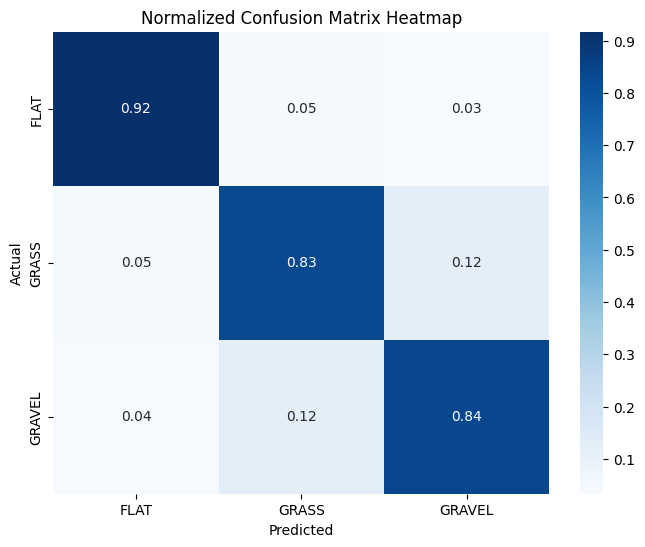

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by dividing each value by the sum of the corresponding row (i.e., normalize by the actual class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix Heatmap')
plt.show()